In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ybifoundation/Dataset/main/Fish.csv')

In [ ]:
df.head()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [ ]:
df.describe()

,Category,Weight,Height,Width,Length1,Length2,Length3
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.264151,398.326415,8.970994,4.417486,26.247170,28.415723,31.227044
std,1.704249,357.978317,4.286208,1.685804,9.996441,10.716328,11.610246
min,1.000000,0.000000,1.728400,1.047600,7.500000,8.400000,8.800000
25%,2.000000,120.000000,5.944800,3.385650,19.050000,21.000000,23.150000
50%,3.000000,273.000000,7.786000,4.248500,25.200000,27.300000,29.400000
75%,4.500000,650.000000,12.365900,5.584500,32.700000,35.500000,39.650000
max,7.000000,1650.000000,18.957000,8.142000,59.000000,63.400000,68.000000


In [ ]:
df.shape

(159, 8)

In [ ]:
df.columns

Index(['Category', 'Species', 'Weight', 'Height', 'Width', 'Length1',
       'Length2', 'Length3'],
      dtype='object')

In [ ]:
y = df['Weight']

In [ ]:
y.shape

(159,)

In [ ]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [ ]:
X = df[['Height', 'Width', 'Length1', 'Length2', 'Length3']]

In [ ]:
X.shape

(159, 5)

In [ ]:
X

,Height,Width,Length1,Length2,Length3
0,11.5200,4.0200,23.2,25.4,30.0
1,12.4800,4.3056,24.0,26.3,31.2
2,12.3778,4.6961,23.9,26.5,31.1
3,12.7300,4.4555,26.3,29.0,33.5
4,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...
154,2.0904,1.3936,11.5,12.2,13.4
155,2.4300,1.2690,11.7,12.4,13.5
156,2.2770,1.2558,12.1,13.0,13.8
157,2.8728,2.0672,13.2,14.3,15.2


In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X.head()

,const,Height,Width,Length1,Length2,Length3
0,1.0,11.5200,4.0200,23.2,25.4,30.0
1,1.0,12.4800,4.3056,24.0,26.3,31.2
2,1.0,12.3778,4.6961,23.9,26.5,31.1
3,1.0,12.7300,4.4555,26.3,29.0,33.5
4,1.0,12.4440,5.1340,26.5,29.0,34.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2529)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((111, 6), (48, 6), (111,), (48,))

In [ ]:
model = sm.OLS(y_train, X_train).fit()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

6      485.768263
54     502.247209
80      94.723820
138    876.571171
91     184.078918
48     219.301305
52     322.325322
103    376.223260
57     372.357305
149   -182.675371
153   -160.604868
108    454.335862
90     159.597558
118    843.485252
131    587.216806
100    299.535214
15     597.729508
46     197.146054
132    639.890467
79      91.200679
64     150.954248
35    -103.083206
133    627.197128
116    795.691769
31     814.687330
146   -204.149651
53     329.987469
28     715.892880
1      359.756344
117    792.324392
9      532.703671
12     552.008323
129    433.484727
111    687.617503
147   -204.763625
125    932.536683
120    810.742342
158    -80.062172
51     284.362879
34     907.080360
23     642.582834
127    959.338482
21     675.287923
113    718.863055
109    623.898492
101    376.483470
10     530.838281
157    -86.235707
dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error,r2_score

In [25]:
mean_squared_error(y_test, y_pred)

16397.34452441141

In [27]:
mean_absolute_percentage_error(y_test, y_pred)

2.508285347160016

In [28]:
mean_absolute_error(y_test, y_pred)

103.02952922678567

In [29]:
r2_score(y_test, y_pred)

0.8349141424416875

In [30]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     181.2
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           5.84e-50
Time:                        07:36:04   Log-Likelihood:                -689.20
No. Observations:                 111   AIC:                             1390.
Df Residuals:                     105   BIC:                             1407.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -519.2834     34.659    -14.983      0.0

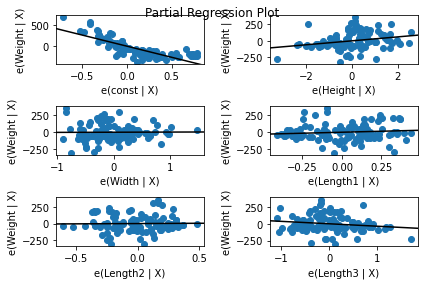

In [31]:
fig = sm.graphics.plot_partregress_grid(model)

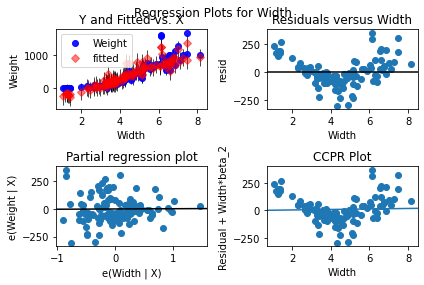

In [52]:
fig = sm.graphics.plot_regress_exog(model, 'Width')

In [43]:
df_new = df.sample(1)

In [44]:
X_new = df_new[['Height', 'Width', 'Length1', 'Length2', 'Length3']]

In [48]:
X_new = sm.add_constant(X_new, has_constant='add')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [49]:
X_new.shape

(1, 6)

In [50]:
y_pred_new = model.predict(X_new)

In [51]:
y_pred_new

133    627.197128
dtype: float64